## Importing Libraries

In [1]:
import pandas as pd
from sklearn.metrics import r2_score
from flaml import AutoML

## Loading the Data

In [2]:
real_state = pd.read_csv('cleaned_data.csv')

real_state

,Address,Bedrooms,Bathrooms,Area(sqft),Year Built,Parking,Price($),Location,price/sqft
0,6716 Carney Ave NW,3,2,1687,1992,yes,250000,Albuquerque,148.19
1,7429 Gila Rd NE,4,2,2245,1973,yes,445990,Albuquerque,198.66
2,9919 Brunswick Pl NW,4,3,2168,2004,yes,350000,Albuquerque,161.44
3,4413 Delamar Ave NE,3,2,1867,1959,yes,255000,Albuquerque,136.58
4,4618 Inspiration Dr SE,4,2,1973,1951,no,280000,Albuquerque,141.92
...,...,...,...,...,...,...,...,...,...
8462,1438 Meridian Pl NW #102,2,1,589,1910,yes,349000,Washington,592.53
8463,631 D St NW #236,1,1,690,2004,no,455000,Washington,659.42
8464,738 Longfellow St NW #306,1,1,479,1900,no,199500,Washington,416.49
8465,301 Massachusetts Ave NW #402,2,2,761,2006,yes,539900,Washington,709.46


In [3]:
X = real_state.drop('Price($)', axis=1)

X

,Address,Bedrooms,Bathrooms,Area(sqft),Year Built,Parking,Location,price/sqft
0,6716 Carney Ave NW,3,2,1687,1992,yes,Albuquerque,148.19
1,7429 Gila Rd NE,4,2,2245,1973,yes,Albuquerque,198.66
2,9919 Brunswick Pl NW,4,3,2168,2004,yes,Albuquerque,161.44
3,4413 Delamar Ave NE,3,2,1867,1959,yes,Albuquerque,136.58
4,4618 Inspiration Dr SE,4,2,1973,1951,no,Albuquerque,141.92
...,...,...,...,...,...,...,...,...
8462,1438 Meridian Pl NW #102,2,1,589,1910,yes,Washington,592.53
8463,631 D St NW #236,1,1,690,2004,no,Washington,659.42
8464,738 Longfellow St NW #306,1,1,479,1900,no,Washington,416.49
8465,301 Massachusetts Ave NW #402,2,2,761,2006,yes,Washington,709.46


In [6]:
y = real_state['Price($)']

y

0        250000
1        445990
2        350000
3        255000
4        280000
         ...   
8462     349000
8463     455000
8464     199500
8465     539900
8466    1349900
Name: Price($), Length: 8467, dtype: int64

In [7]:
# Splitting the data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [8]:
X.shape, y.shape

((8467, 8), (8467,))

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5926, 8), (2541, 8), (5926,), (2541,))

## Building a Regression Model

In [10]:
from flaml import AutoML
automl = AutoML()
automl.fit(X_train, y_train, task="regression")

[flaml.automl: 10-06 09:27:33] {1432} INFO - Evaluation method: cv
[flaml.automl: 10-06 09:27:33] {1478} INFO - Minimizing error metric: 1-r2
[flaml.automl: 10-06 09:27:40] {1515} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree']
[flaml.automl: 10-06 09:27:40] {1748} INFO - iteration 0, current learner lgbm
[flaml.automl: 10-06 09:27:40] {1865} INFO - Estimated sufficient time budget=1896s. Estimated necessary time budget=4s.
[flaml.automl: 10-06 09:27:40] {1938} INFO -  at 7.5s,	estimator lgbm's best error=0.6433,	best estimator lgbm's best error=0.6433
[flaml.automl: 10-06 09:27:40] {1748} INFO - iteration 1, current learner lgbm
[flaml.automl: 10-06 09:27:41] {1938} INFO -  at 7.7s,	estimator lgbm's best error=0.6433,	best estimator lgbm's best error=0.6433
[flaml.automl: 10-06 09:27:41] {1748} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-06 09:27:41] {1938} INFO -  at 7.8s,	estimator lgbm's best error=0.3980,	best estimator 

[flaml.automl: 10-06 09:27:49] {1938} INFO -  at 15.9s,	estimator extra_tree's best error=0.0995,	best estimator rf's best error=0.0849
[flaml.automl: 10-06 09:27:49] {1748} INFO - iteration 37, current learner extra_tree
[flaml.automl: 10-06 09:27:49] {1938} INFO -  at 16.1s,	estimator extra_tree's best error=0.0995,	best estimator rf's best error=0.0849
[flaml.automl: 10-06 09:27:49] {1748} INFO - iteration 38, current learner extra_tree
[flaml.automl: 10-06 09:27:49] {1938} INFO -  at 16.5s,	estimator extra_tree's best error=0.0972,	best estimator rf's best error=0.0849
[flaml.automl: 10-06 09:27:49] {1748} INFO - iteration 39, current learner rf
[flaml.automl: 10-06 09:27:50] {1938} INFO -  at 16.9s,	estimator rf's best error=0.0849,	best estimator rf's best error=0.0849
[flaml.automl: 10-06 09:27:50] {1748} INFO - iteration 40, current learner rf
[flaml.automl: 10-06 09:27:50] {1938} INFO -  at 17.1s,	estimator rf's best error=0.0849,	best estimator rf's best error=0.0849
[flaml.a

[flaml.automl: 10-06 09:28:30] {1938} INFO -  at 57.0s,	estimator extra_tree's best error=0.0938,	best estimator rf's best error=0.0820
[flaml.automl: 10-06 09:28:30] {1748} INFO - iteration 76, current learner rf
[flaml.automl: 10-06 09:28:31] {1938} INFO -  at 57.7s,	estimator rf's best error=0.0820,	best estimator rf's best error=0.0820
[flaml.automl: 10-06 09:28:31] {1748} INFO - iteration 77, current learner rf
[flaml.automl: 10-06 09:28:31] {1938} INFO -  at 58.1s,	estimator rf's best error=0.0796,	best estimator rf's best error=0.0796
[flaml.automl: 10-06 09:28:31] {1748} INFO - iteration 78, current learner xgboost
[flaml.automl: 10-06 09:28:31] {1938} INFO -  at 58.4s,	estimator xgboost's best error=0.1357,	best estimator rf's best error=0.0796
[flaml.automl: 10-06 09:28:31] {1748} INFO - iteration 79, current learner rf
[flaml.automl: 10-06 09:28:32] {1938} INFO -  at 58.8s,	estimator rf's best error=0.0710,	best estimator rf's best error=0.0710
[flaml.automl: 10-06 09:28:32]

In [11]:
# Export the best model
print(automl.model)

## Predictions

In [14]:
y_test_predict = automl.predict(X_test)

y_test_predict

array([1822380.17792208,  319082.3135506 ,  841985.10885278, ...,
       5577573.47619048,  380996.44555555, 2278764.47619048])

## Scatter plot of Actual vs Predicted Prices

Text(0.5, 0, 'Actual Price')

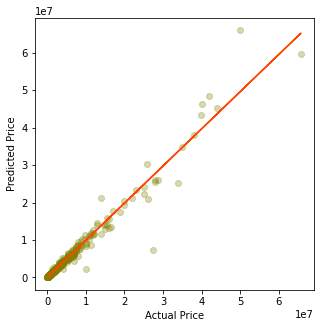

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=y_test_predict, c='olive', alpha=0.3)

#Add trendline
x = np.polyfit(y_test, y_test_predict, 1)
p = np.poly1d(x)

plt.plot(y_test,p(y_test), 'orangered') 
plt.ylabel("Predicted Price")
plt.xlabel("Actual Price")

## Model Performance

In [20]:
r2_y_test = r2_score(y_test, y_test_predict)

round(r2_y_test, 2)

0.96

## Saving the Model

In [21]:
import pickle
with open('automl.pkl', 'wb') as f:
    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)